## Russell 3000 Index

I have a PDF of the Russell 3000 constituents, and I want to extract all stock tickers and company names.

https://www.ishares.com/us/products/239714/ishares-russell-3000-etf and click "Download" for the XLSX (maybe XML?)


In [1]:
import pandas as pd
import numpy as np

import json
import os
import time
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

#import PyPDF2
#from PyPDF2 import PdfReader

In [2]:
russell_df = pd.read_csv('russell_3000_index.csv')

russell_df.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AAPL,APPLE INC,Information Technology,Equity,"627,609,535.64",6.08,"627,609,535.64","4,028,044.00",155.81,United States,NASDAQ,USD,1.0
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"504,709,879.66",4.89,"504,709,879.66","1,971,061.00",256.06,United States,NASDAQ,USD,1.0
2,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"298,546,176.05",2.89,"298,546,176.05","2,341,355.00",127.51,United States,NASDAQ,USD,1.0
3,TSLA,TESLA INC,Consumer Discretionary,Equity,"181,066,099.74",1.75,"181,066,099.74","670,094.00",270.21,United States,NASDAQ,USD,1.0
4,GOOGL,ALPHABET INC CLASS A,Communication,Equity,"170,894,796.00",1.66,"170,894,796.00","1,584,560.00",107.85,United States,NASDAQ,USD,1.0


In [3]:
equity_df = russell_df[russell_df['Asset Class']=='Equity']

equity_df = equity_df[['Ticker', 'Name', 'Sector', 'Shares', 'Location', 'Exchange']]

In [4]:
ticker_list = equity_df['Ticker']

### Pulling SCT pay directly from tickers in a list

In [5]:
from sec_api import ExecCompApi
import config

import json

import time
from time import sleep

In [8]:
execCompApi = ExecCompApi(config.sec_api_key)

In [9]:
#define a function with ticker argument that pulls SCT pay

def SCTpay_puller(ticker):
    result_ticker = execCompApi.get_data(f'{ticker}')
    
    #saving the dictionary as a text file
    with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt', 'w') as converted_file:
        converted_file.write(json.dumps(result_ticker))    
    

In [10]:
SCTpay_puller('AAPL')

In [11]:
start_time = time.time()

bad_ticker_list = []

for ticker in ticker_list:
    sleep(.1)
    try:
        SCTpay_puller(ticker)
    except:
        bad_ticker_list.append(ticker)
        print(f"Ticker {ticker} throws an error")
    
print(f"This code took {time.time() - start_time} seconds")

Ticker TJX throws an error


KeyboardInterrupt: 

### Now take those text files and combine them into a single DataFrame

In [12]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [13]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
This code took 40.62692618370056 seconds


In [14]:
starter_df.reset_index(inplace=True,drop=True)

In [18]:
starter_df

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN
3,7c60bb804071675ae15ec930f6dea190,1090872,A,Robert McMahon,"Senior Vice President, Chief Financial Officer",2021,663500,0,2291271,0,1007000,176196,4711733,NaN
4,259b710a8befe67c61a2c3dec14f344a,1090872,A,Padraig McDonnell,"Senior Vice President, President Cross-Lab Group",2021,495000,0,1249771,0,686716,499472,3243927,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173772,65031058801add0364554c29d65e6347,1489979,TFM,Craig Carlock,,2009,0,0,0,0,0,15067,1475018,NaN
173773,c37aabf7f94134aef1f9497a544392b6,1489979,TFM,Sean Crane,,2009,0,0,0,0,0,23181,1670897,NaN
173774,329cc12c3b0109ea681cab39a198225b,1489979,TFM,Lisa Klinger,,2009,0,0,0,0,0,95105,2330074,NaN
173775,bb696be59ae7c1bde8d37ae07477efd1,1489979,TFM,Marc Jones,and Marketing,2009,209500,75000,0,880273,0,15827,1180600,NaN


Text(0.5, 0, 'NEO Salary')

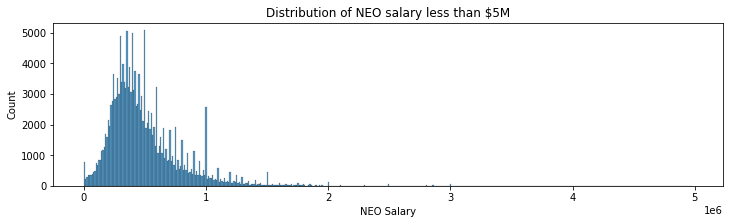

In [43]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'])
plt.title('Distribution of NEO salary less than $5M')
plt.xlabel('NEO Salary')

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'NEO Salary')

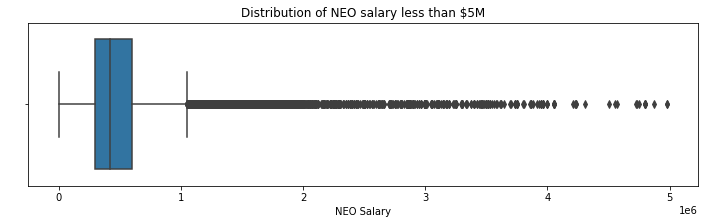

In [48]:
plt.figure(figsize=(12,3))
sns.boxplot(starter_df[(starter_df['salary'] < 5000000) & (starter_df['salary'] > 0)]['salary'])
plt.title('Distribution of NEO salary less than $5M')
plt.ylabel(' ')
plt.xlabel('NEO Salary')

Text(0.5, 0, 'NEO Stock Award')

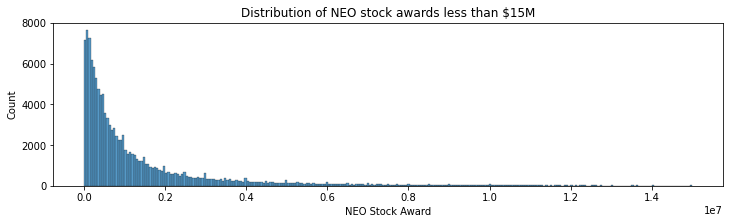

In [51]:
plt.figure(figsize=(12,3))
sns.histplot(starter_df[(starter_df['stockAwards'] < 15000000) & (starter_df['stockAwards'] > 0)]['stockAwards'])
plt.title('Distribution of NEO stock awards less than $15M')

plt.xlabel('NEO Stock Award')

Text(0.5, 0, 'NEO Stock Award')

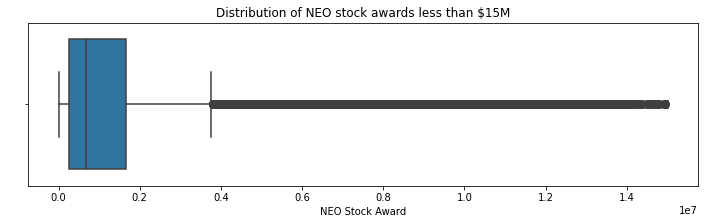

In [54]:
plt.figure(figsize=(12,3))
sns.boxplot(x=starter_df[(starter_df['stockAwards'] < 15000000) & (starter_df['stockAwards'] > 0)]['stockAwards'])
plt.title('Distribution of NEO stock awards less than $15M')
plt.ylabel(' ')
plt.xlabel('NEO Stock Award')